Purpose:
Pandas is used for loading, storing, and manipulating structured data

In [2]:
import pandas as pd

Purpose:
NumPy provides numerical computation support.

 to
 Perform mathematical operations

In [3]:
import numpy as np

Purpose:
Splits the dataset into training data and testing (unseen) data.


In [4]:
from sklearn.model_selection import train_test_split

Purpose:
Converts categorical variables into numerical format.

Generates polynomial and interaction features from existing features.


In [5]:
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

Purpose:
Applies different preprocessing steps to different columns.


In [6]:
from sklearn.compose import ColumnTransformer

Purpose:
Creates a workflow that combines preprocessing and modeling.


In [7]:
from sklearn.pipeline import Pipeline


Purpose:
Implements linear and multiple linear regression models.


In [8]:
from sklearn.linear_model import LinearRegression

Purpose:
Implements K-Nearest Neighbors regression.


In [9]:
from sklearn.neighbors import KNeighborsRegressor


Purpose:
Evaluate the accuracy of regression models.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [25]:
import matplotlib.pyplot as plt


This imports the matplotlib library so you can create visualizations, like scatter plots and lines.



In [11]:
from google.colab import files
uploaded = files.upload()


Saving Housing Price.csv to Housing Price.csv


This code allows us to upload files from local computer into Google Colab so that the dataset can be used for data analysis and machine learning.


In [12]:
df = pd.read_csv("Housing Price.csv")


This line of code loads the House Pricing dataset from a CSV file into the Google Colab environment using the pandas library.

In [13]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


df.head() displays the first 13 rows of the dataset.
This helps us see:

.What the data looks like

.The names of the columns

df.info() provides a summary of the dataset, including:

.The number of rows and columns

.The data type of each column (numerical or categorical)

.Whether there are missing (null) values

In [14]:
X = df.drop("price", axis=1)
y = df["price"]


This code separates the dataset into input features (X) and the target variable (y)

In [15]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns


Identify Categorical and Numerical Columns

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)


Preprocessing using One-Hot Encoding (Best Technique)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Split Dataset into Training and Unseen Test Data

In [18]:
linear_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", LinearRegression())
])

linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('model', LinearRegression())])

first preprocesses the dataset and then trains a linear regression model to learn how different house features affect the house price.


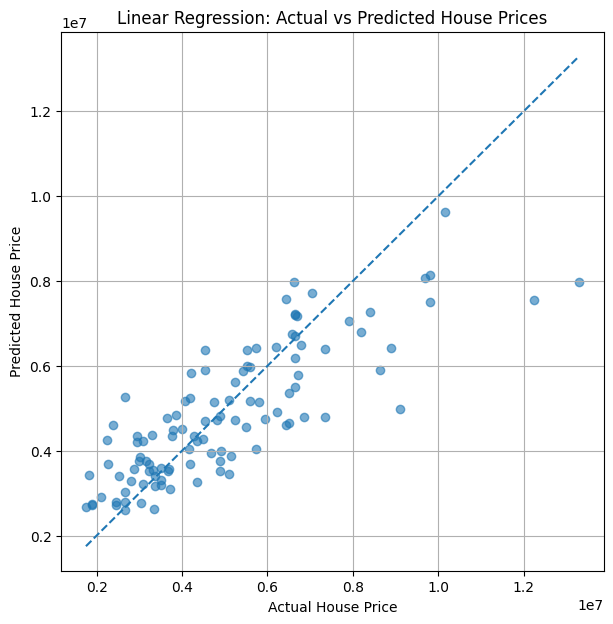

In [26]:


y_pred = linear_model.predict(X_test)

plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.6  # makes overlapping points visible
)

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Linear Regression: Actual vs Predicted House Prices")

# Perfect prediction line
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())

plt.plot(
    [min_price, max_price],
    [min_price, max_price],
    linestyle="--"
)

plt.grid(True)
plt.show()


This code visualizes how well your linear regression model predicts house prices. The closer the scatter points are to the dashed diagonal line, the better your model’s predictions.

In [23]:
poly_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

poly_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

This line trains a model that can predict house prices by capturing non-linear trends in the data

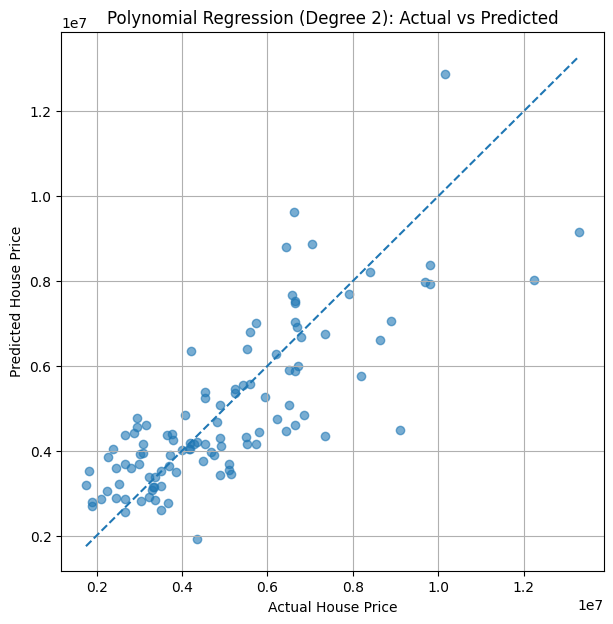

In [27]:


# Predict using polynomial regression model
y_pred_poly = poly_model.predict(X_test)

plt.figure(figsize=(7,7))

plt.scatter(
    y_test,
    y_pred_poly,
    alpha=0.6
)

plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Polynomial Regression (Degree 2): Actual vs Predicted")

# Perfect prediction line
min_price = min(y_test.min(), y_pred_poly.min())
max_price = max(y_test.max(), y_pred_poly.max())

plt.plot(
    [min_price, max_price],
    [min_price, max_price],
    linestyle="--"
)

plt.grid(True)
plt.show()


in this we can  visualizes how well the polynomial regression model predicts house prices. Points near the dashed line indicate accurate predictions, and points further away show prediction errors.

In [22]:
knn_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=5))
])

knn_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object'))])),
                ('model', KNeighborsRegressor())])

K-Nearest Neighbors (KNN) Regression

In [23]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2  :", r2_score(y_test, y_pred))


In [24]:
print("🔵 Linear Regression")
evaluate(linear_model, X_test, y_test)

print("\n🟢 Polynomial Regression")
evaluate(poly_model, X_test, y_test)

print("\n🟠 KNN Regression")
evaluate(knn_model, X_test, y_test)


🔵 Linear Regression
MAE : 970043.4039201635
MSE : 1754318687330.6614
RMSE: 1324506.9600914377
R2  : 0.6529242642153188

🟢 Polynomial Regression
MAE : 1036473.4397006979
MSE : 1904199647439.6892
RMSE: 1379927.4065832917
R2  : 0.6232717017216092

🟠 KNN Regression
MAE : 1293998.1651376146
MSE : 3219733933211.0093
RMSE: 1794361.706348809
R2  : 0.3630054037670484


 The linear regression model explains approximately 65.3% of the variance in house prices. It produces the lowest error values among the tested models, indicating strong predictive performance.

 Polynomial regression adds higher-order terms to capture non-linear patterns. In this dataset, the extra complexity does not improve performance and slightly reduces accuracy, indicating mild overfitting and that house prices are largely influenced by linear relationships.

 KNN regression shows the weakest performance among the three models. The lower R² score indicates that the model explains only 36.3% of the variance in house prices.

 Linear regression achieved the best performance on the house pricing dataset, explaining over 65% of price variability, while polynomial and KNN models did not provide significant improvement.

diyana abera  ID 1501839

In [28]:
!git clone https://github.com/diyana61/Machine-Learning-Regression-Models-using-House-Price-Dataset.git

Cloning into 'Machine-Learning-Regression-Models-using-House-Price-Dataset'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 6.25 KiB | 6.25 MiB/s, done.


In [32]:
!cp /content/house_price.ipynb /content/Machine-Learning-Regression-Models-using-House-Price-Dataset/


cp: cannot stat '/content/house_price.ipynb': No such file or directory
